# Principal Component Analysis with Cancer Data

In [1]:
#Importing all the necessary modules

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [3]:
bc = pd.read_csv('breast-cancer-wisconsin-data.csv')
bc.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
# Id column is to identify rows, hence can be skipped while performing analysis.

bc.drop(columns='ID',inplace=True)

In [5]:
# All columns have numerical values.
# Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
# Checking the data types for each attribute.

bc.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [8]:
# It is always a good idea to consider the breadth vs depth analysis in order to find out the chances for curse of dimensionality.
# Here 699 rows seem sufficient to capture 10 columns.

print('The number of rows are:', bc.shape[0])
print('The number of columns are:', bc.shape[1])

The number of rows are: 699
The number of columns are: 10


In [10]:
# Understanding EDA.

#Clump Thickness: Mean > Median, Right Skewed, Positively Skewed. 
#Cell Size: Mean > Median, Right Skewed, Positively Skewed.
# Cell shape: Mean > Median, Right Skewed, Positively Skewed.
# Marginal Adhesion: Mean > Median, Right Skewed, Positively Skewed.
# Single Epithelial Cell Size: Mean > Median, Right Skewed, Positively Skewed.
# Normal Nucleoli: Mean > Median, Right Skewed, Positively Skewed.
# Bland Chromatin: Mean > Median, Right Skewed, Positively Skewed.
# Mitoses: Mean > Median, Right Skewed, Positively Skewed.

# Bare Nuclei Column seems to be missing here. There must be some missing values in it. Lets find out.

bc.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


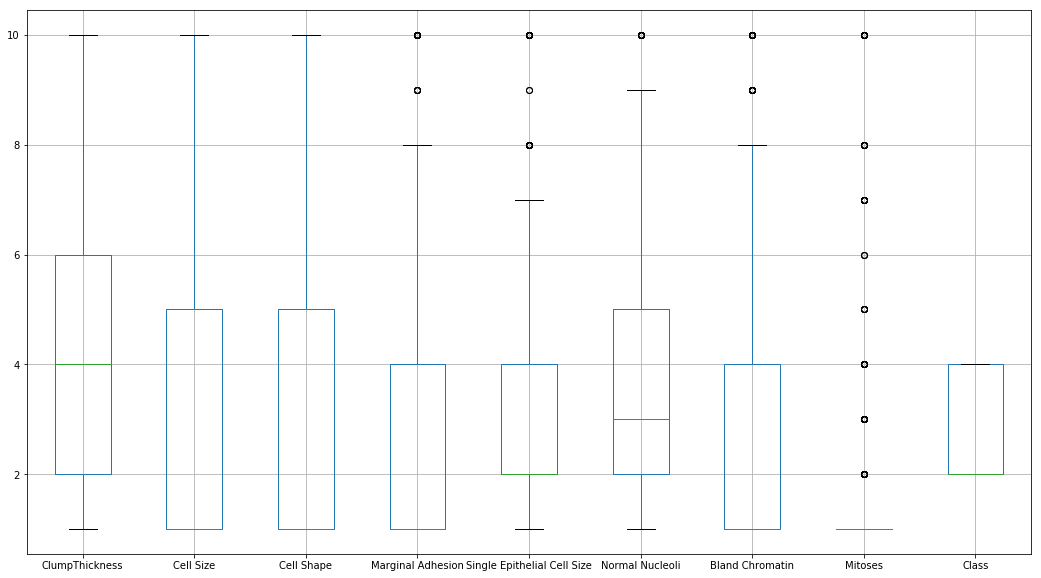

In [11]:
# Visualizing the data using boxplot.

bc.boxplot(figsize=(18,10))

Bare Nuclei column seems to have some irrelevant data due to which it's data type is object.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [12]:
bc

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [13]:
# We could see "?" values in column, this should be removed from data set. 
# It is due to "?" values in the Bare Nuclei, we couldn't see it apprearing while performing the describe function.

bc['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [14]:
# Checking if there are any missing values in each of the attributes. 
# There are no missing values in any attributes.

bc.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [16]:
# Figuring out the number of rows having "?"
# There are 16 rows where the Bare Nuclei value is not present.

temp = pd.DataFrame(bc['Bare Nuclei'].str.isdigit())
temp[temp['Bare Nuclei'] == False].count()


Bare Nuclei    16
dtype: int64

In [17]:
temp[temp['Bare Nuclei']==False]

,Bare Nuclei
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


In [18]:
# No missing values found. So let us try to remove "?" from Bare Nuclei column.
# Replacing "?" with Nan values.

bc['Bare Nuclei'].replace('?', np.NaN , inplace=True)
bc['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [19]:
# Converting object datatype to float64.

bc['Bare Nuclei'] = bc.iloc[:,6:7].astype(dtype='float64')

In [20]:
# Verifying the conversion.

bc['Bare Nuclei'].dtype

dtype('float64')

The removal of '?' is successful. Now treating the 'Nan' values by replacing them with mean. 

In [21]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data or impute them.
# Here we would like to impute it with suitable values.

bc.iloc[:,6:7] = bc.iloc[:,6:7].apply(lambda x:x.fillna(x.mean()))

In [23]:
# Verifying the change.

bc['Bare Nuclei'].unique()

array([ 3.,  9.,  1.,  2.,  4.,  5.,  7.,  8.,  6., 10.])

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [25]:
# Checking for correlation amongst the attributes.
# The value of correlation ranges from -1 to +1.
# If correlation coefficient is +1 = Perfect direct (increasing)linear correlation.
# If the correlation coefficient is -1 = Perfect decreasing (inverse) correlation.

bc.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.756616,0.712244,0.423170,1.000000


2    458
4    241
Name: Class, dtype: int64

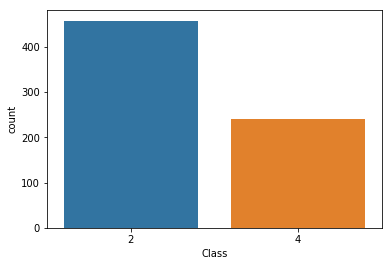

In [26]:
# Countplot.

sns.countplot(x=bc['Class'])

bc['Class'].value_counts()

Class 2 has a higher frequency than Class 4.

(10.5, -0.5)

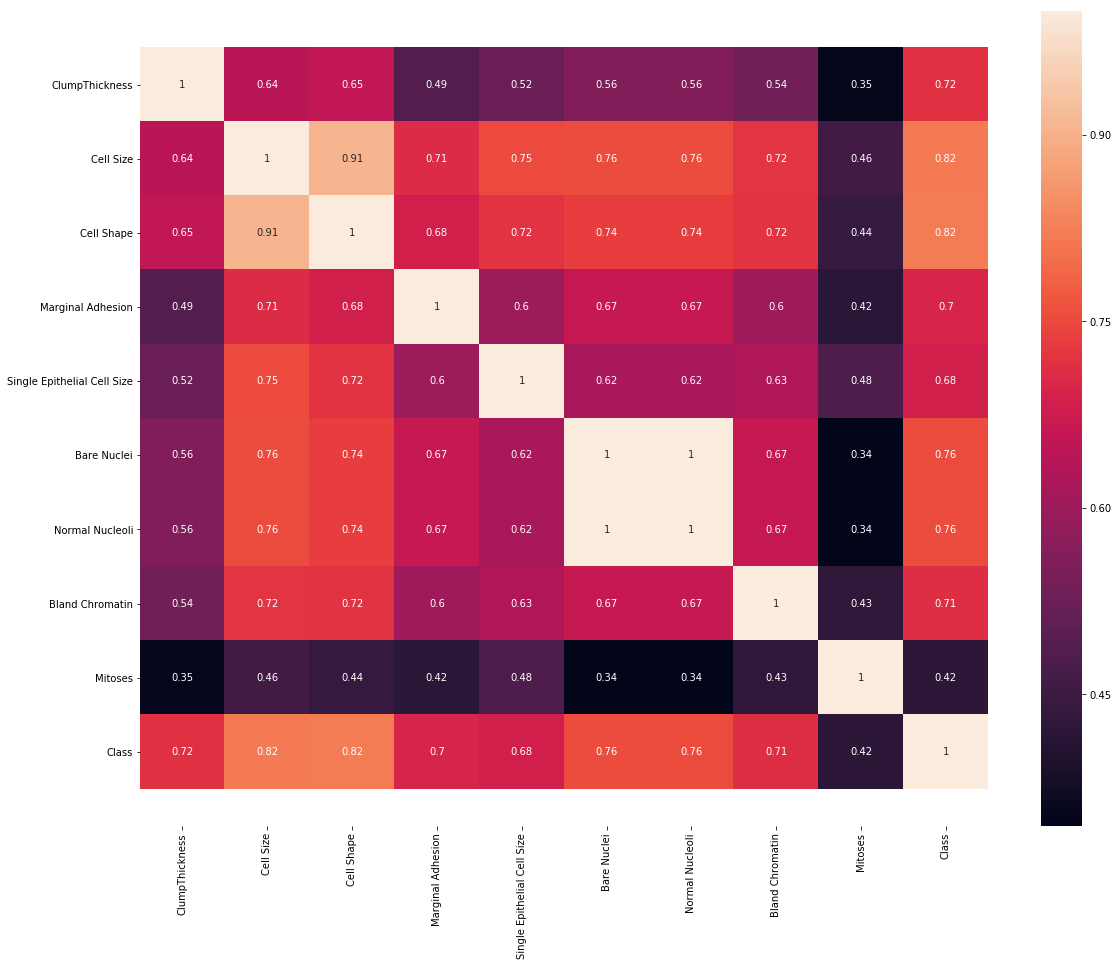

In [28]:
# Visualizing the results using heatmap.

import seaborn as sns
import matplotlib.pyplot as plt
f = plt.figure(figsize=(19, 15))

ax=sns.heatmap(bc.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

Except mitoses the other attributes seem to have a strong correlation with the target variable.

1) Cell Size shows high significance with Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Normal Nucleoli and Bland Chromatin.

2) Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


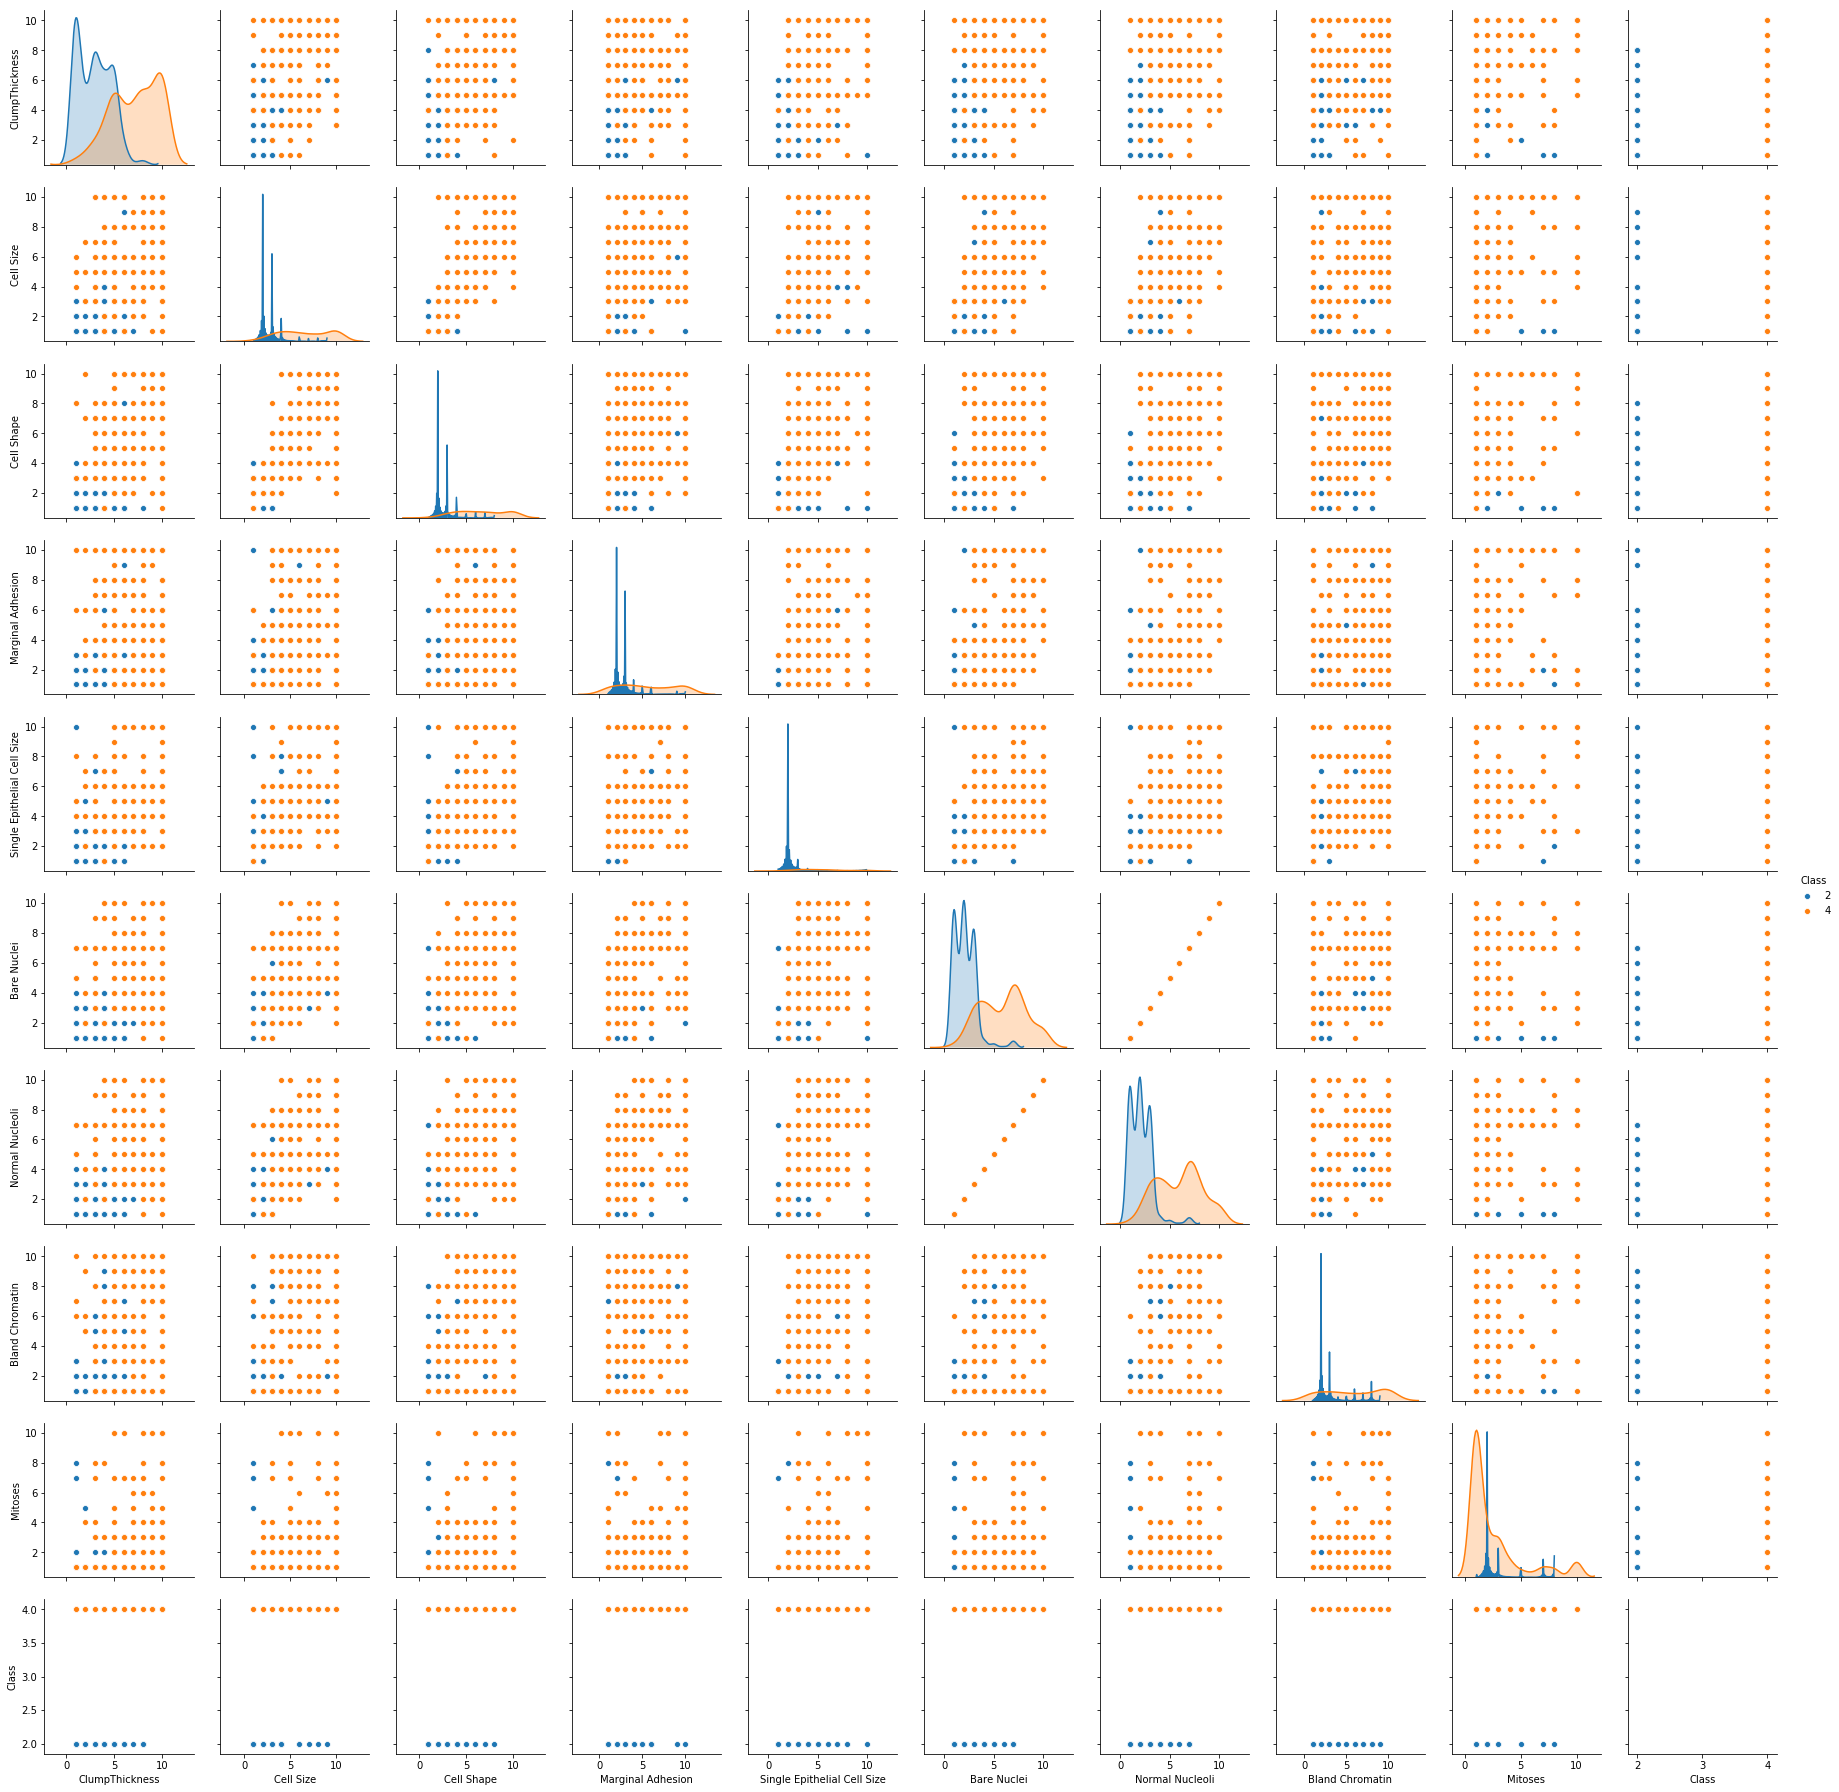

In [30]:
# Pairplot.

sns.pairplot(bc, diag_kind= 'kde', hue= 'Class')

1) Relationship between variables shows come correlation. 

2) Distribution of variables show most of the values are concentrated on lower side, though range remains same for all that is 
 between 1 to 10.

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [28]:
# We could see most of the outliers are now removed.

In [31]:
from scipy.stats import zscore
bc_z= bc.apply(zscore)

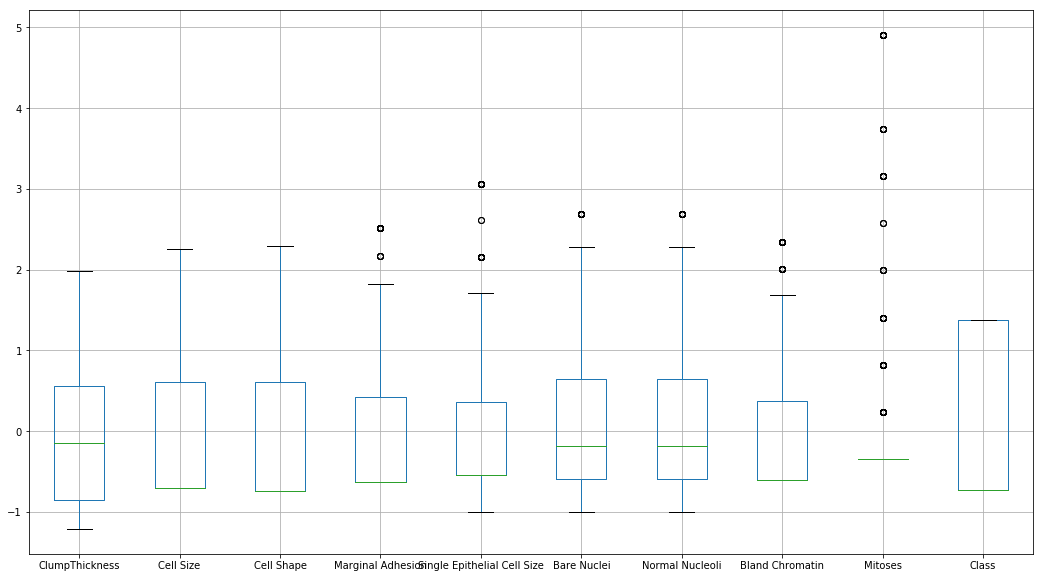

In [32]:
bc_z.boxplot(figsize=(18,10))

# Q6 Create a covariance matrix for identifying Principal components

PCA

Step 1 : Create covariance matrix


In [33]:
X_z = bc_z.drop(labels = 'Class', axis = 1)
y_z = bc_z['Class']

In [34]:
X_cov_mat = np.cov(X_z.T)
print('Covariance Matrix \n%s', X_cov_mat)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.5592282
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.75680368
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.73700282
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66767051
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.61698451
  0.61698451 0.62978166 0.47978787]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 1.00143266
  1.00143266 0.66683179 0.34466258]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 1.00143266
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.66683179
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.34466258
  0.34466258 0.42894941 1.00143266]]


# Q7 Identify eigen values and eigen vector

Step 2 : Get eigen values and eigen vectors.

In [35]:
eigenvalues, eigenvectors = np.linalg.eig(X_cov_mat)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.93862117e-01 -9.88260814e-03  8.06114160e-01 -1.60396240e-02
   2.56062858e-01 -4.08014091e-01 -1.75621052e-01  2.41586863e-02
  -1.17409636e-16]
 [-3.76736601e-01 -3.19078324e-04  1.15281830e-01 -7.45897836e-01
  -4.78637948e-01  2.24040347e-01 -3.83346814e-03 -9.54614670e-02
  -7.09423933e-16]
 [-3.70852746e-01  1.12651150e-02  1.76581222e-01  6.61367786e-01
  -5.87844140e-01  2.16620362e-01  4.80109366e-03 -3.52831009e-02
   1.15308051e-15]
 [-3.25567911e-01  5.42032943e-03 -2.74318391e-01  2.57780890e-02
   2.02153942e-01  1.89682844e-01 -8.33097507e-01  2.17172309e-01
  -4.26883473e-17]
 [-3.30437176e-01 -2.02148679e-01  2.82701879e-02  6.59106096e-02
   5.02449803e-01  4.88721007e-01  2.08605923e-01 -5.56761452e-01
  -3.52757600e-17]
 [-3.58845891e-01  3.63035153e-01 -2.83435585e-01  1.80516651e-02
   5.06994584e-02 -3.45162100e-01  1.34215804e-01 -1.38030137e-01
   7.07106781e-01]
 [-3.58845891e-01  3.63035153e-01 -2.83435585e-01  1.80516651e-02
   5.06994

In [36]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eigen_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eigen_pairs.sort(reverse = True)

train_eigen_pairs

[(6.02603009062795,
  array([-0.29386212, -0.3767366 , -0.37085275, -0.32556791, -0.33043718,
         -0.35884589, -0.35884589, -0.33375316, -0.22375817])),
 (0.8289334261355314,
  array([-9.88260814e-03, -3.19078324e-04,  1.12651150e-02,  5.42032943e-03,
         -2.02148679e-01,  3.63035153e-01,  3.63035153e-01, -3.06054685e-02,
         -8.33280338e-01])),
 (0.575227841711327,
  array([ 0.80611416,  0.11528183,  0.17658122, -0.27431839,  0.02827019,
         -0.28343558, -0.28343558, -0.01107637, -0.2624218 ])),
 (0.4633770610834597,
  array([-0.40801409,  0.22404035,  0.21662036,  0.18968284,  0.48872101,
         -0.3451621 , -0.3451621 ,  0.21953183, -0.41846179])),
 (0.39548851488907794,
  array([-0.17562105, -0.00383347,  0.00480109, -0.83309751,  0.20860592,
          0.1342158 ,  0.1342158 ,  0.43968417,  0.04692202])),
 (0.36473450689853654,
  array([ 0.02415869, -0.09546147, -0.0352831 ,  0.21717231, -0.55676145,
         -0.13803014, -0.13803014,  0.770482  , -0.0128175 ]

In [38]:
# Extract the descending ordered eigenvalues and eigenvectors.

train_eigenvalues_sorted = [train_eigen_pairs[index][0] for index in range(len(eigenvalues))]
train_eigenvectors_sorted = [train_eigen_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm if the values have been sorted, print out eigenvalues.

print('Eigenvalues in descending order: \n%s' %train_eigenvalues_sorted)

Eigenvalues in descending order: 
[6.02603009062795, 0.8289334261355314, 0.575227841711327, 0.4633770610834597, 0.39548851488907794, 0.36473450689853654, 0.2684925335002997, 0.09061000796183775, 7.419069284017815e-18]


# Q8 Find variance and cumulative variance by each eigen vector

In [39]:
total = sum(eigenvalues)
var_explained = [(i / total) for i in train_eigenvalues_sorted] 
cum_var_exp = np.cumsum(var_explained)  # An array of cumulative variance.

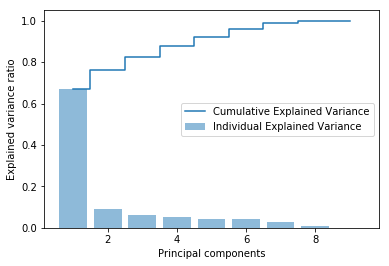

In [41]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='Cumulative Explained Variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [42]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_cov_mat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
print(pca.components_)

[[-0.13188151 -0.31235577 -0.31529946 -0.22708217 -0.13951458 -0.47394198
  -0.47394198 -0.22688995  0.46246698]
 [ 0.81909662  0.07337871  0.13569739 -0.28891782 -0.03621581 -0.24905226
  -0.24905226 -0.04119728 -0.30780863]
 [-0.16667278  0.38077086  0.37645436  0.11585899  0.5921016  -0.33707959
  -0.33707959  0.27117432  0.14397025]
 [ 0.07747305 -0.01116856 -0.0193598   0.85240495 -0.15054011 -0.2042247
  -0.2042247  -0.34084025 -0.21131573]
 [-0.06174645 -0.12651755 -0.07232868  0.13831047 -0.44531343 -0.16372709
  -0.16372709  0.82559146 -0.14933532]
 [-0.05602938 -0.40968173 -0.49115011 -0.00374689  0.58580643 -0.03851216
  -0.03851216  0.10444127 -0.48034945]
 [ 0.15438259  0.67040413 -0.7021612   0.06208064  0.00457503  0.02751636
   0.02751636  0.08229123  0.14674089]
 [-0.32960591  0.22838948  0.01609922 -0.21170129 -0.16836993  0.41646504
  -0.64219039 -0.1594544  -0.39305953]
 [-0.37212921  0.25785459  0.01817622 -0.23901341 -0.19009177 -0.59626468
   0.34141793 -0.180026

In [44]:
X_pca_transform = pca.transform(X_z)
X_pca_transform.shape

(699, 9)

In [45]:
temp1 = pd.DataFrame(data = X_pca_transform)
temp1.head()

,0,1,2,3,4,5,6,7,8
0,2.178334,0.538561,-1.774257,0.073950,0.033391,0.963265,-0.350269,0.972527,1.097995
1,0.844568,0.247471,0.569884,0.786496,-0.705956,1.416759,-0.275668,0.483996,0.546438
2,2.272076,-0.043654,-1.655786,0.018882,0.077280,1.003091,-0.460004,1.206811,1.362505
3,0.162047,1.220595,0.728740,-0.708008,0.972616,-0.684694,-0.247573,1.028005,1.160631
4,2.066035,0.044941,-1.633812,0.643896,0.152282,0.980552,-0.361622,0.941280,1.062717


# Q10 Find correlation between components and features

In [46]:
X_z= pd.concat([X_z,temp1],axis=1)

In [47]:
X_z.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,0,1,2,3,4,5,6,7,8
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.179662,-0.179662,-0.611825,-0.343912,2.178334,0.538561,-1.774257,0.073950,0.033391,0.963265,-0.350269,0.972527,1.097995
1,0.206936,0.283845,0.266875,0.768621,1.710106,-0.179662,-0.179662,-0.284112,-0.343912,0.844568,0.247471,0.569884,0.786496,-0.705956,1.416759,-0.275668,0.483996,0.546438
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.179662,-0.179662,-0.611825,-0.343912,2.272076,-0.043654,-1.655786,0.018882,0.077280,1.003091,-0.460004,1.206811,1.362505
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,-0.179662,-0.179662,1.354454,-0.343912,0.162047,1.220595,0.728740,-0.708008,0.972616,-0.684694,-0.247573,1.028005,1.160631
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.179662,-0.179662,-0.611825,-0.343912,2.066035,0.044941,-1.633812,0.643896,0.152282,0.980552,-0.361622,0.941280,1.062717


In [48]:
X_z.cov()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,0,1,2,3,4,5,6,7,8
ClumpThickness,1.001433,0.645836,0.655527,0.487053,0.522564,0.559228,0.559228,0.536602,0.350535,-1.213717,0.388412,0.510591,-0.091206,-0.148753,-0.493773,0.286288,-0.712693,-0.804639
Cell Size,0.645836,1.001433,0.908181,0.706593,0.752876,0.756804,0.756804,0.723900,0.459350,-1.618991,-0.053871,0.895436,-0.142685,-0.188571,-0.657451,0.349316,-0.712693,-0.804639
Cell Shape,0.655527,0.908181,1.001433,0.684058,0.720699,0.737003,0.737003,0.720477,0.439540,-1.600554,-0.016345,0.881324,-0.143622,-0.166288,-0.673673,0.216994,-0.712693,-0.804639
Marginal Adhesion,0.487053,0.706593,0.684058,1.001433,0.600458,0.667671,0.667671,0.604217,0.418231,-1.388352,-0.253658,0.690890,0.212802,-0.080083,-0.493961,0.281330,-0.712693,-0.804639
Single Epithelial Cell Size,0.522564,0.752876,0.720699,0.600458,1.001433,0.616985,0.616985,0.629782,0.479788,-1.313220,-0.109629,0.957315,-0.188847,-0.296289,-0.319508,0.277402,-0.712693,-0.804639
Bare Nuclei,0.559228,0.756804,0.737003,0.667671,0.616985,1.001433,1.001433,0.666832,0.344663,-1.721359,-0.234022,0.470406,-0.212301,-0.194854,-0.517477,0.281039,-0.712693,-0.804639
Normal Nucleoli,0.559228,0.756804,0.737003,0.667671,0.616985,1.001433,1.001433,0.666832,0.344663,-1.721359,-0.234022,0.470406,-0.212301,-0.194854,-0.517477,0.281039,-0.712693,-0.804639
Bland Chromatin,0.536602,0.723900,0.720477,0.604217,0.629782,0.666832,0.666832,1.001433,0.428949,-1.410038,-0.112405,0.784097,-0.264570,0.170649,-0.466647,0.284699,-0.712693,-0.804639
Mitoses,0.350535,0.459350,0.439540,0.418231,0.479788,0.344663,0.344663,0.428949,1.001433,-0.451102,-0.255336,0.642627,-0.200807,-0.175635,-0.606997,0.282816,-0.712693,-0.804639
0,-1.213717,-1.618991,-1.600554,-1.388352,-1.313220,-1.721359,-1.721359,-1.410038,-0.451102,3.411858,0.172897,-1.241961,0.248303,0.255227,0.955303,-0.518066,1.310244,1.479282


In [49]:
X_z.iloc[0:8,0:8]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.179662,-0.179662,-0.611825
1,0.206936,0.283845,0.266875,0.768621,1.710106,-0.179662,-0.179662,-0.284112
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.179662,-0.179662,-0.611825
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,-0.179662,-0.179662,1.354454
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.179662,-0.179662,-0.611825
5,1.273138,2.251526,2.287222,1.820022,1.710106,2.282766,2.282766,1.354454
6,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,-0.179662,-0.179662,-0.611825
7,-0.859266,-0.699995,-0.406574,-0.633247,-0.549561,-0.179662,-0.179662,-0.611825


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [51]:
jokes =pd.read_csv('jokes.csv')
jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [52]:
ratings = jokes.iloc[0:200,:]
ratings.shape

(200, 101)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [53]:
ratings.replace(99,0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [54]:
ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [55]:
ratings_sort = ratings.mean().sort_values(ascending=False)

In [56]:
ratings_sort

NumJokes    70.11000
Joke50       4.05540
Joke36       3.61150
Joke53       3.57150
Joke35       3.22315
Joke29       3.18995
Joke27       3.05240
Joke62       2.86185
Joke49       2.85000
Joke32       2.77955
Joke31       2.65710
Joke69       2.63890
Joke21       2.56045
Joke65       2.53785
Joke56       2.35975
Joke66       2.29775
Joke68       2.29720
Joke61       2.26565
Joke42       2.10995
Joke14       1.96950
Joke54       1.86345
Joke46       1.80970
Joke47       1.45255
Joke89       1.44285
Joke48       1.39085
Joke12       1.34195
Joke6        1.32005
Joke11       1.16675
Joke34       1.16255
Joke26       1.15680
              ...   
Joke99       0.13500
Joke98       0.09370
Joke9        0.01670
Joke59      -0.00965
Joke33      -0.03505
Joke5       -0.03790
Joke8       -0.08530
Joke67      -0.09720
Joke60      -0.12315
Joke41      -0.13770
Joke75      -0.14515
Joke71      -0.15430
Joke51      -0.23595
Joke90      -0.34395
Joke74      -0.40885
Joke43      -0.52730
Joke37      -